# 5 . 오류역전파를 이용한 신경망 학습

### 수업 환경 구성을 위한 코드 (수업전 실행)

#### MNIST 데이터 적재
* common 모듈 사용을 위한 경로 지정시 pickle 오류 발생 문제 회피
* 사전에 load_mnist 라이브러리 import 및 MNIST 파일 데이터 load

In [1]:
# 5.0.1 mnist.py 업로드
from google.colab import files
src = list(files.upload().values())[0]

Saving mnist.py to mnist.py


In [2]:
# 5.0.2 MNIST 데이터 적재
from mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


#### common 라이브러리 
* 수업 시간에 작성한 여러 함수 및 원활한 프로그램 수행을 위한 utility 등 저자 제공 파일들
* common 라이브러리 내 모듈 사용을 위해 google drive mount 및 경로 지정
* 사전에 G 드라이브 내 Colab Notebooks 디렉토리에 common 폴더 복제

In [27]:
# 5.0.3 common 폴더 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
# 5.0.4 수행 경로 변경 
%cd /content/drive/MyDrive/Colab Notebooks


/content/drive/MyDrive/Colab Notebooks


## 5.1 계산 그래프
### 5.1.1 계산 그래프로 풀이
### 5.1.2 국소적인 계산
### 5.1.3 왜 계산그래프로 푸는가?

## 5.2 연쇄법칙
### 5.2.1 계산 그래프의 역전파
### 5.2.2 연쇄법칙이란?
### 5.2.3 연쇄법칙과 계산그래프


## 5.3 역전파
### 5.3.1 덧셈 노드의 역전파
### 5.3.2 곱셈 노드의 역전파
### 5.3.3 사과 쇼핑의 예



## 5.4 단순한 계층 구현하기


### 5.4.1 곱셈 계층

#### class MulLayer

In [3]:
# 5.4.1.1 곱셈 계층 정의
class MulLayer :
    def __init__(self):
        self.x = None
        self.y = None
        
    def forward (self, x, y) :
        self.x = **
        self.y = **
        out = ***
        return out
    
    def backward (self, dout) :
        # x와 y를 바꾼다.
        dx = dout * ***   
        dy = dout * ***
        return dx, dy


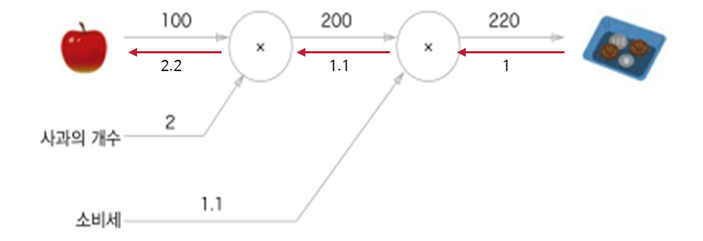

In [12]:
# 5.4.1.2 곱셈 계층을 이용한 과일가계 합산 시뮬레이션 
apple = 100
apple_num = 2 
tax = 1.1

# Layer 계층
mul_apple_layer = ***
mul_tax_layer = ***

# forward 순전파
apple_price = mul_apple_layer.*** (apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print (f'price {price:.1f}') #220


price 220.0


In [13]:
# 5.4.1.3 backward 역전파를 이용한 미분
dprice = 1
dapple_price, dtax = mul_tax_layer.***(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print (f'dapple_num {dapple_num:.1f}, dapple {dapple}') # 110 2.2
print (f'dtax {dtax}')   #200

dapple_num 110.0, dapple 2.2
dtax 200


### 5.4.2 덧셈 계층

#### class AddLayer

In [6]:
# 5.4.2.1 덧셈 계층 정의
class AddLayer :
    def __init__(self) :
        pass
    def forward (self, x, y) :
        out = ***
        return out
    def backward (self, dout) :
        dx = dout * 1 
        dy = dout * 1
        return dx, dy

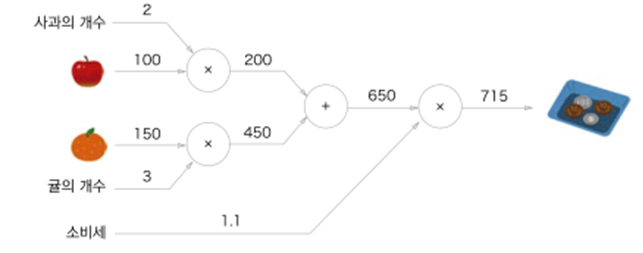

In [9]:
# 5.4.2.2 과일 가계 사과와 귤 버전의 순전파와 역전파

apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer 계층들
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = *** ()
mul_tax_layer = MulLayer()

# forward 순전파
apple_price = mul_apple_layer.forward (apple, apple_num)  #1
orange_price = mul_orange_layer.forward(orange, orange_num)  #2
all_price = add_apple_orange_layer.forward (apple_price, orange_price) #3
price = mul_tax_layer.forward (all_price, tax)

# backward 역전파
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice) #4
dapple_price, dorange_price = add_apple_orange_layer.backward (dall_price) #3
dorange, dorange_num = mul_orange_layer.backward (dorange_price) #2
dapple, dapple_num = mul_apple_layer.backward(dapple_price) #1

print (f'price {price:.1f}')
print (f'dapple_num {dapple_num:.1f}, dapple {dapple}')
print (f'dorange{dorange:.1f}, dorange_num {dorange_num}')
print (f'dtax {dtax}')

price 715.0
dapple_num 110.0, dapple 2.2
dorange3.3, dorange_num 165.0
dtax 650


## 5.5. 활성화함수 계츧 구현


### 5.5.1 ReLU 계층

#### class ReLu

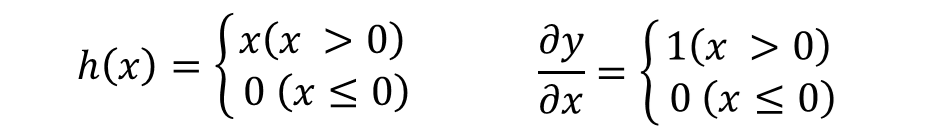

In [ ]:
# 5.5.1.1 Relu 계층 정의
class Relu :
    def __init__(self) :
        self.mask = None
    def forward (self, x) :
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = ***
        return out
    def backward(self, dout) :
        dout[self.mask] = ***
        dx = dout
        return dx

### 5.5.2 sigmoid 계층

#### class Sigmoid

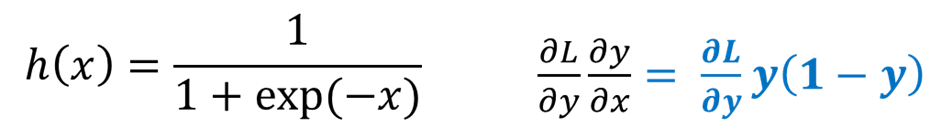

In [ ]:
# 5.5.2.1 Sigmoid 계층 정의
class Sigmoid :
    def __init__(self) :
        self.out = None
    def forward (self, x) :
        out = 1 / ( 1 + np.exp (-x))
        self.out = ***
        return out
    def backward (self, dout) :
        dx = dout * ***
        return dx

## 5.6 Affine / Softmax 계층의 구현
### 5.6.1 Affine 계층

In [18]:
# 5.6.1.1  신경망 신호 전달에서의 입력값, 가중치, 편향의 형상 확인
import numpy as np

X = np.array ([10,20])
W = np.array ([[0.1,0.2,0.3],[0.4,0.5,0.6]])
B = np.array ([100,200,300])

print ("X,W,B's shape ", X.shape, W.shape, B.shape)
Y = np.dot (X, W) + B
print ("Y's shape ",Y.shape)

X,W,B's shape  (2,) (2, 3) (3,)
Y's shape  (3,)


In [19]:
# 5.6.1.2  신경망 신호 전달에서의 연산 과정에서의 형상
print (f'X \n {X}')
print (f'W \n {W}')
print (f'B \n {B}')

print (f'XW \n {np.dot(X,W)}')
print (f'XW +B \n {np.dot(X,W) + B}')

X 
 [10 20]
W 
 [[0.1 0.2 0.3]
 [0.4 0.5 0.6]]
B 
 [100 200 300]
XW 
 [ 9. 12. 15.]
XW +B 
 [109. 212. 315.]


### 5.6.2 뱃치형 Affine 계층

In [23]:
# 5.6.2.1 미분값들을 합하는 연산 예시
dY = np.array([[1,2,3],[4,5,6]])
dB = np.sum(dY, axis =0 )
print (f'dY :,\n {dY}')
print (f'dB :,\n {dB}')

dY :,
 [[1 2 3]
 [4 5 6]]
dB :,
 [5 7 9]


In [22]:
# 5.6.2.2 np.sum()의 axis
np.sum(dY), np.sum(dY, axis=0), np.sum(dY, axis=1)

(21, array([5, 7, 9]), array([ 6, 15]))

#### class Affine (simple ver)

In [24]:
# 5.6.2.3 Affine 계층 정의 (simple ver.)

class Affine :
    def __init__(self, W, b) :
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
        
    def forward (self, x) :
        self.x = x
        out = np.dot (x, self.W) + self.b
        return out
    
    def backward (self, dout) :
        dx = np.dot (dout, self.W.T)
        self.dW = np.dot (self.x.T, dout)
        self.db = np.sum(dout, axis = 0)
        
        return dx

### 5.6.3 Softmax-with-Loss 계층

- softmax : $$ y_k = \frac{e^{a_k}}{\Sigma^n_{i=1}e^{a_i}} $$
- cross entropy error : $$ E = - \Sigma_kt_k\log y_k$$

#### class SoftmaxWithLoss

In [25]:
# 5.6.3.1 소프트맥스 with Loss 계층 정의
class SoftmaxWithLoss :
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None
    
    def forward (self, x, t) :
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss
    
    def backward(self, dout = 1) :
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        return dx

## 5.7 오차역전파법의 구현
### 5.7.1 신경망 학습의 전체 그림


### 5.7.2 오차역전파법을 적용한 신경망 구현하기

#### class TwoLayerNet

In [29]:
# 5.7.2.1 TwoLayerNet 신경망 정의 (오차 역전파 적용 버전)

from common.layers import *
from common.gradient import numerical_gradient

import numpy as np
from collections import OrderedDict

class TwoLayerNet :
    
    def __init__(self, input_size, hidden_size, output_size,
                weight_init_std = 0.01) :
     
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
                            np.random.randn (hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] =\
            Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] =\
            Affine(self.params['W2'], self.params['b2'])
        
        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x) :
        for layer in self.layers.values():
            x = layer.forward(x)
            
        return x
    
    def loss (self, x , t) :
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy (self, x, t):
        y=self.predict(x)
        y = np.argmax(y, axis= 1)
        if t.ndim != 1 : t = np.argmax(t, axis = 1)
            
        accuracy = np.sum (y==t) / float (x.shape[0])
        return accuracy
    
    def numerical_gradient (self, x, t):
        loss_W = lambda W : self.loss(x,t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads     
        
    def gradient (self, x, t) :
        # forward
        self.loss(x, t) 
        
        # backward
        dout = 1 
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers :
            dout = layer.backward(dout)
            
        # 설정 
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db
        
        return grads

### 5.7.3 오차역전파법으로 구한 기울기 검증하기

In [31]:
# 5.7.3.1 오차역전파 법으로 구한 기울기와 수치 미분으로 구한 기울기의 비교 
import numpy as np
from mnist import load_mnist

# 데이터 읽어 들이기 , 정규화 = True,  원-핫 인코딩 = True
(x_train, t_train), (x_test, t_test ) =\
    load_mnist (normalize = True, one_hot_label = True)

#  신경망 계층 클래스 생성
network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

# 3건의 데이터로 검증
x_batch = x_train[:3]
t_batch = t_train[:3]

# 수치 미분 방식 numerical_gradient 와 오차 역전파 방식 gradient 비교 
grad_numerical = network.*** (x_batch, t_batch)
grad_backprop = network.***(x_batch, t_batch)

# 각 가중치의 절대오차의 평균을 구한다. 
print ('수치미분으로 구한 기울기와 오차 역전파로 구한 기울기 차이 비교')
for key in grad_numerical.keys() :
    diff = np.average (np.abs (grad_backprop[key]-grad_numerical[key]))
    print (f'{key} : {diff}')

수치미분으로 구한 기울기와 오차 역전파로 구한 기울기 차이 비교
W1 : 1.3279933022554751e-08
b1 : 1.324598887182286e-07
W2 : 6.693012575836014e-09
b2 : 1.4035081263713555e-07


### 5.7.4 오차역전파법을 사용한 학습 구현하기

In [32]:
# 5.7.4.1 오차 역전파법을 사용한 학습

import numpy as np
from mnist import load_mnist

# 데이터 읽어 들이기
(x_train, t_train), (x_test, t_test ) =\
    load_mnist (normalize = True, one_hot_label = True)

# 훈련 손실
# 훈련 및 시험 정확도 기록
train_loss_list = []
train_acc_list = []
test_acc_list = []

# 하이퍼 파라미터
iters_num = 10000  # 반복횟수
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

#  신경망 계층 클래스 생성
network = TwoLayerNet(input_size = 784, hidden_size = 50, \
                      output_size = 10)

# 정확도 계산을 위한 지점 설정 (전체 데이터 순회 epoch)
iter_per_epoch = max(train_size/batch_size , 1)

for i in range(iters_num) :
    # 1단계 미니배치  
    batch_mask = np.random.choice (train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 2단계 기울기 계산
    # 오차역전파법으로 기울기를 구한다. 
    grad = network.gradient(x_batch, t_batch)
    
    # 3단계 매개변수 갱신
    for key in ('W1','b1','W2','b2') :
        network.params[key] -= learning_rate * grad[key]
        
    # 그래프 작성을 위한 학습경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
  
    # 1 epoch 마다 정확도 계산 및 진행경과 출력
    if i% iter_per_epoch == 0 :
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f'train_acc={train_acc:.4f},',\
              f' test_acc={test_acc:.4f}')

train_acc=0.1061,  test_acc=0.1041
train_acc=0.9059,  test_acc=0.9074
train_acc=0.9225,  test_acc=0.9234
train_acc=0.9374,  test_acc=0.9379
train_acc=0.9463,  test_acc=0.9465
train_acc=0.9532,  test_acc=0.9507
train_acc=0.9581,  test_acc=0.9550
train_acc=0.9601,  test_acc=0.9568
train_acc=0.9645,  test_acc=0.9601
train_acc=0.9672,  test_acc=0.9620
train_acc=0.9688,  test_acc=0.9645
train_acc=0.9724,  test_acc=0.9653
train_acc=0.9739,  test_acc=0.9663
train_acc=0.9760,  test_acc=0.9674
train_acc=0.9767,  test_acc=0.9683
train_acc=0.9785,  test_acc=0.9686
train_acc=0.9792,  test_acc=0.9704
